In [195]:
import sys
import json
import nltk
import re
from collections import Counter
import string
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from nltk import bigrams
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from tqdm.notebook import tqdm
import numpy as np
import math
import statistics
from nltk.corpus import words
nltk.download('words')

[nltk_data] Downloading package stopwords to C:\Users\Sun
[nltk_data]     Coliamco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sun Coliamco\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to C:\Users\Sun
[nltk_data]     Coliamco\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Sun
[nltk_data]     Coliamco\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Sun
[nltk_data]     Coliamco\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Sun
[nltk_data]     Coliamco\AppData\Roaming

True

In [196]:
import pyLDAvis
import pyLDAvis.lda_model
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [132]:
yt_data =pd.read_csv("../../Data/Raw/test_youtube_comments_filtered.csv")

In [133]:
yt_data.shape

(11698, 8)

In [134]:
yt_data.head()

,video_id,video_title,video_published_at,comment_id,author,published_at,like_count,text
0,gTo-lPOGPdg,Australia v India | WTC23 Final | Match Highlights,2024-02-13T03:00:17Z,Ugx3ILTXGKmTnCQAem54AaABAg,@muhammadabdullah4337,2024-02-13T03:54:39Z,7301,"ICC upload back-to-back three heartbreak moments for India in the previous 3 days. U-19 final, C..."
1,gTo-lPOGPdg,Australia v India | WTC23 Final | Match Highlights,2024-02-13T03:00:17Z,Ugwu72NlIMxn_LSSmYB4AaABAg,@anuraggamerz9278,2024-02-29T16:20:03Z,5329,Travis Head is the real villian for India in the finals🥶💀
2,gTo-lPOGPdg,Australia v India | WTC23 Final | Match Highlights,2024-02-13T03:00:17Z,UgwNkzuTGtb_LG1cFNN4AaABAg,@DJSarvesh007,2024-02-13T03:35:01Z,2192,Head in Tests and ODIs gave a tough time for Indian bowlers 🥺. Complete player for Aussies.
3,gTo-lPOGPdg,Australia v India | WTC23 Final | Match Highlights,2024-02-13T03:00:17Z,UgzH9bibBcj5mvb1VAx4AaABAg,@Saurabh__Shukla,2024-02-13T03:28:07Z,1918,Smithy came in final after a horrible BGT and blaze all the guns. BIG GAME PLAYER.🥶🔥
4,gTo-lPOGPdg,Australia v India | WTC23 Final | Match Highlights,2024-02-13T03:00:17Z,UgxVyA2u0KRii-AnMfN4AaABAg,@nirajghaleedits601,2024-02-27T11:46:03Z,1642,Now ICC will post 2003 CWC Final 🇦🇺 vs 🇮🇳\n💀💀


In [135]:
yt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11698 entries, 0 to 11697
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   video_id            11698 non-null  object
 1   video_title         11698 non-null  object
 2   video_published_at  11698 non-null  object
 3   comment_id          11698 non-null  object
 4   author              11698 non-null  object
 5   published_at        11698 non-null  object
 6   like_count          11698 non-null  int64 
 7   text                11698 non-null  object
dtypes: int64(1), object(7)
memory usage: 731.3+ KB


In [136]:
yt_data['video_published_at'] = pd.to_datetime(yt_data['video_published_at'])
yt_data['published_at'] = pd.to_datetime(yt_data['published_at'])

In [137]:
yt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11698 entries, 0 to 11697
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   video_id            11698 non-null  object             
 1   video_title         11698 non-null  object             
 2   video_published_at  11698 non-null  datetime64[ns, UTC]
 3   comment_id          11698 non-null  object             
 4   author              11698 non-null  object             
 5   published_at        11698 non-null  datetime64[ns, UTC]
 6   like_count          11698 non-null  int64              
 7   text                11698 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(1), object(5)
memory usage: 731.3+ KB


In [138]:
yt_data.isna().sum()

video_id              0
video_title           0
video_published_at    0
comment_id            0
author                0
published_at          0
like_count            0
text                  0
dtype: int64

In [139]:
yt_data = yt_data.dropna()
yt_data.isna().sum()

video_id              0
video_title           0
video_published_at    0
comment_id            0
author                0
published_at          0
like_count            0
text                  0
dtype: int64

In [140]:
# oldest and newest comment dates
oldest = yt_data['published_at'].min()
newest = yt_data['published_at'].max()

print(f"Oldest : {oldest}")
print(f"Newest : {newest}")

Oldest : 2024-01-27 12:24:41+00:00
Newest : 2024-10-17 23:50:09+00:00


In [141]:
# no of unique authors
yt_data['author'].nunique()

10795

In [142]:
# possible bots as authors
# due to the recent uttp bot attack on the Platform, promoting illegal contents
# any user contains that segment in their name are considered as bot
contains_bot = yt_data['author'].str.lower().str.contains('bot|uttp') 
authors_with_bot = yt_data[contains_bot]
possible_bots = authors_with_bot['author'].unique()
possible_bots

array(['@cluchbot6509', '@sahiljambotkar-xr5nl', '@t10teambotlike67',
       '@mukeshbothra9532', '@megarobot356', '@steveskrobot9496',
       '@Day_Trading_Bot', '@bothipikiransai9761', '@SlayBotYT',
       '@botbeast9627', '@bot994', '@Bot8YT'], dtype=object)

In [143]:
# comments by possible bots
bot_comments = yt_data[yt_data['author'].isin(possible_bots)]
bot_comments.shape

(14, 8)

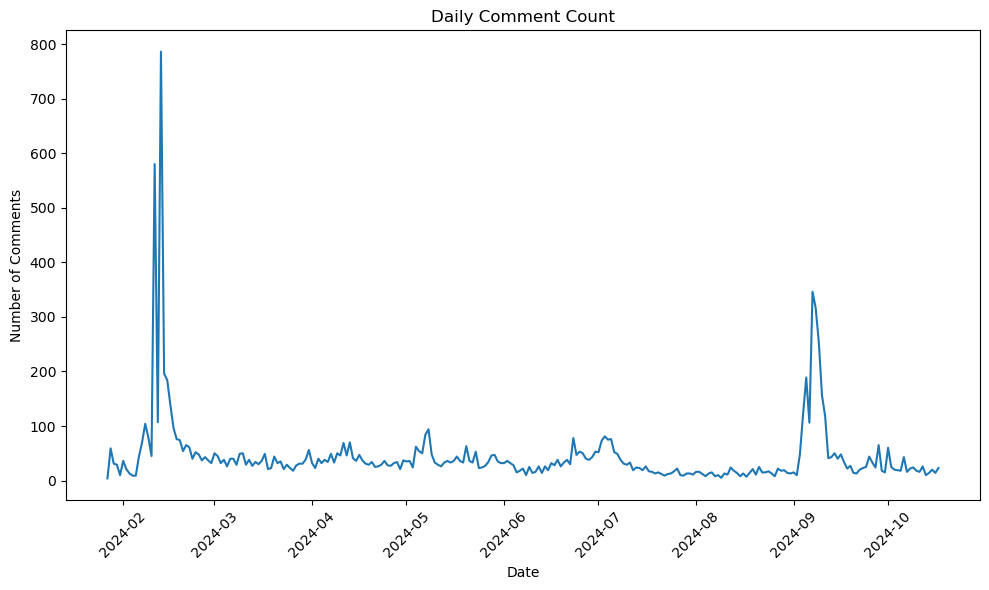

In [144]:
# comments in each day

grouped_by_date = yt_data.groupby(yt_data['published_at'].dt.date).size()

# creating plot
plt.figure(figsize=(10,6))
grouped_by_date.plot(kind='line')
plt.title('Daily Comment Count')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [145]:
pd.options.display.max_colwidth = 100 # 50
import datetime

# t20 worldcup 2nd June 2024 - 30 June 24
date_start = datetime.date(2024, 9, 1)
date_end = datetime.date(2024, 3, 30)
yt_data[ yt_data['video_published_at'].dt.date < date_end]


,video_id,video_title,video_published_at,comment_id,author,published_at,like_count,text
0,gTo-lPOGPdg,Australia v India | WTC23 Final | Match Highlights,2024-02-13 03:00:17+00:00,Ugx3ILTXGKmTnCQAem54AaABAg,@muhammadabdullah4337,2024-02-13 03:54:39+00:00,7301,"ICC upload back-to-back three heartbreak moments for India in the previous 3 days. U-19 final, C..."
1,gTo-lPOGPdg,Australia v India | WTC23 Final | Match Highlights,2024-02-13 03:00:17+00:00,Ugwu72NlIMxn_LSSmYB4AaABAg,@anuraggamerz9278,2024-02-29 16:20:03+00:00,5329,Travis Head is the real villian for India in the finals🥶💀
2,gTo-lPOGPdg,Australia v India | WTC23 Final | Match Highlights,2024-02-13 03:00:17+00:00,UgwNkzuTGtb_LG1cFNN4AaABAg,@DJSarvesh007,2024-02-13 03:35:01+00:00,2192,Head in Tests and ODIs gave a tough time for Indian bowlers 🥺. Complete player for Aussies.
3,gTo-lPOGPdg,Australia v India | WTC23 Final | Match Highlights,2024-02-13 03:00:17+00:00,UgzH9bibBcj5mvb1VAx4AaABAg,@Saurabh__Shukla,2024-02-13 03:28:07+00:00,1918,Smithy came in final after a horrible BGT and blaze all the guns. BIG GAME PLAYER.🥶🔥
4,gTo-lPOGPdg,Australia v India | WTC23 Final | Match Highlights,2024-02-13 03:00:17+00:00,UgxVyA2u0KRii-AnMfN4AaABAg,@nirajghaleedits601,2024-02-27 11:46:03+00:00,1642,Now ICC will post 2003 CWC Final 🇦🇺 vs 🇮🇳\n💀💀
...,...,...,...,...,...,...,...,...
11538,VQpTVVsNHQs,Glenn Maxwell produces one of the greatest ODI knocks of all-time | CWC23,2024-02-11 04:08:33+00:00,UgwIwGDFyL8gBBc3bHx4AaABAg,@saeedasohail5914,2024-05-06 09:19:06+00:00,0,Mene live dekha maza aya
11539,VQpTVVsNHQs,Glenn Maxwell produces one of the greatest ODI knocks of all-time | CWC23,2024-02-11 04:08:33+00:00,UgyVzeZ1VYi_XVLUh1B4AaABAg,@developerstech5270,2024-05-06 09:16:23+00:00,0,"Fvrt batsman, Best gift for me❤"
11540,VQpTVVsNHQs,Glenn Maxwell produces one of the greatest ODI knocks of all-time | CWC23,2024-02-11 04:08:33+00:00,Ugx1OMDw733Mg7RYVU14AaABAg,@abhishekmaxwell7039,2024-05-06 09:12:56+00:00,0,"When he is his country uniform,,he defeated his opposition single Handley"
11541,VQpTVVsNHQs,Glenn Maxwell produces one of the greatest ODI knocks of all-time | CWC23,2024-02-11 04:08:33+00:00,Ugw7jOSTglvfEaD5mzd4AaABAg,@msworld1043,2024-05-06 09:04:58+00:00,0,Just share this video to RCB😂😂😂😂😂😂


In [146]:
# median comments per day
grouped_by_date.median()

32.0

There are only 32 comments as median for TEST due to the small number of data size

In [147]:
# days with more than 1000 comments
grouped_by_date[grouped_by_date > 1000]

Series([], dtype: int64)

In [148]:
# Unlike t20, TEST has way less comments, and None of the videos have more than 1000 comments

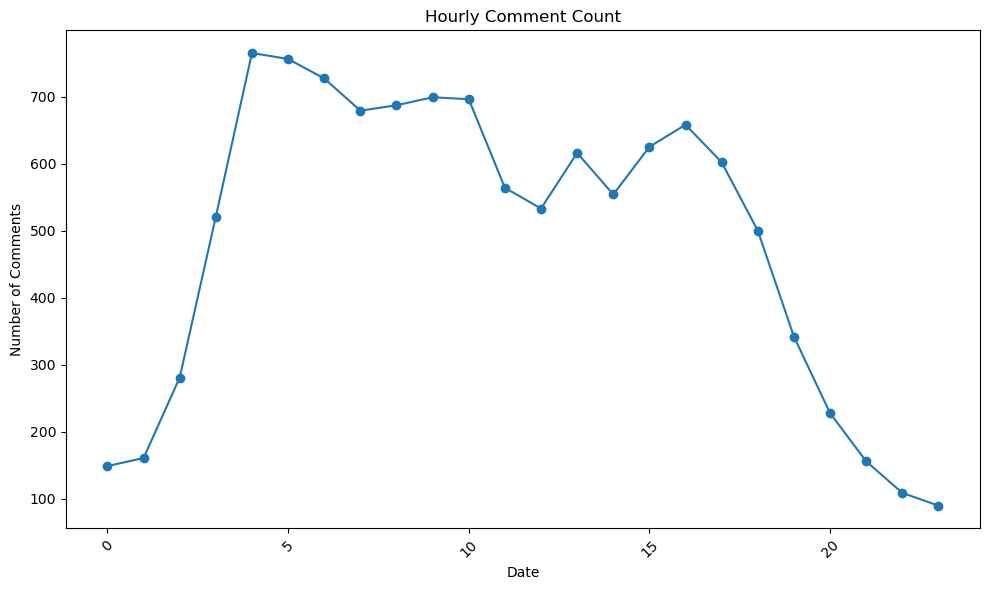

In [149]:
# comments by hour
grouped_by_hour = yt_data.groupby(yt_data['published_at'].dt.hour).size()

# creating plot
plt.figure(figsize=(10,6))
grouped_by_hour.plot(kind='line',marker='o')
plt.title('Hourly Comment Count')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [150]:
# sorted by comment-like count
yt_data_sorted = yt_data.sort_values(by='like_count', ascending=False).head(n=50)
yt_data_sorted

,video_id,video_title,video_published_at,comment_id,author,published_at,like_count,text
7393,VQpTVVsNHQs,Glenn Maxwell produces one of the greatest ODI knocks of all-time | CWC23,2024-02-11 04:08:33+00:00,Ugw6NOLeBuR1hQ2R0ql4AaABAg,@thelolhounds2.0,2024-02-11 04:32:53+00:00,14176,Maxwell 24* Cummins 5* to Maxwell 201* Cummins 12*. The most incredible innings and partnership ...
4390,MbKhGIPRvGI,Australian young gun Sam Konstas put to the test as he compares the game&#39;s greats #cricket,2024-01-28 04:00:06+00:00,UgwhGlUR6bwoJeFz3214AaABAg,@randomstuff9960,2024-01-28 05:08:30+00:00,12908,Bro really picked Subhman over David...💀💀
7394,VQpTVVsNHQs,Glenn Maxwell produces one of the greatest ODI knocks of all-time | CWC23,2024-02-11 04:08:33+00:00,UgydTIw5EcrrJNm7eHd4AaABAg,@pritamsingh2549,2024-02-11 04:09:33+00:00,12492,Kis kis ne live dekha ??
0,gTo-lPOGPdg,Australia v India | WTC23 Final | Match Highlights,2024-02-13 03:00:17+00:00,Ugx3ILTXGKmTnCQAem54AaABAg,@muhammadabdullah4337,2024-02-13 03:54:39+00:00,7301,"ICC upload back-to-back three heartbreak moments for India in the previous 3 days. U-19 final, C..."
4391,MbKhGIPRvGI,Australian young gun Sam Konstas put to the test as he compares the game&#39;s greats #cricket,2024-01-28 04:00:06+00:00,Ugx1WaD-1GbFj6crgqZ4AaABAg,@abhishekrawat5129,2024-01-31 11:44:55+00:00,6066,I'm Indian and still shocked he picked Gill over Warner 😂
1,gTo-lPOGPdg,Australia v India | WTC23 Final | Match Highlights,2024-02-13 03:00:17+00:00,Ugwu72NlIMxn_LSSmYB4AaABAg,@anuraggamerz9278,2024-02-29 16:20:03+00:00,5329,Travis Head is the real villian for India in the finals🥶💀
7395,VQpTVVsNHQs,Glenn Maxwell produces one of the greatest ODI knocks of all-time | CWC23,2024-02-11 04:08:33+00:00,UgxGS8HyGk-PIELy4Xp4AaABAg,@Jollyfellowdiaries,2024-02-11 04:47:55+00:00,5258,Bat-well🔥\nBowl-well🔥\nField-well🔥\nMaxwell ♥\nIPL 2024 - jumped into well 🔥
7396,VQpTVVsNHQs,Glenn Maxwell produces one of the greatest ODI knocks of all-time | CWC23,2024-02-11 04:08:33+00:00,UgwjnTD7lca5XYdgIih4AaABAg,@dxrnobita2809,2024-02-11 04:10:15+00:00,4275,Greatest inning of all time I have ever witnessed
4392,MbKhGIPRvGI,Australian young gun Sam Konstas put to the test as he compares the game&#39;s greats #cricket,2024-01-28 04:00:06+00:00,UgyxabMSweiGp4VZzAh4AaABAg,@anshverma9839,2024-01-29 08:04:52+00:00,4241,Virat ko last me rakhte hai ki competition one sided na ho Jaye suru se hi 😂
6935,80kTU6Q7zKo,It&#39;s a fiery contest happening in Benoni 🥵#U19WorldCup #Cricket #ytshorts,2024-02-06 12:50:45+00:00,UgyBsQ4F2tAV2HXyfx94AaABAg,@Abhi-hz4fq,2024-03-28 01:27:13+00:00,3047,Coming after His IPL 2024 debut


In [151]:
unique_videos = yt_data_sorted['video_id'].unique()
len(unique_videos)

6

In [152]:
# comment length

In [153]:
# post and comment length
post_length = []

for body in yt_data['text']:
    post_length.append(len(body))

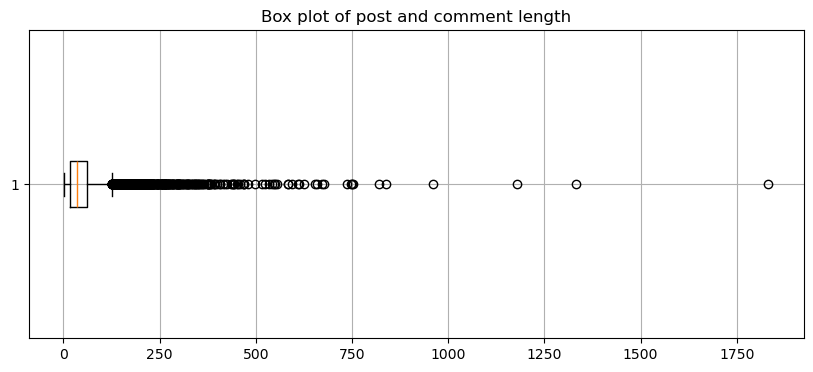

In [154]:
# visalizing post/comment length distribution
plt.figure(figsize=(10, 4))
plt.boxplot(post_length, vert=False)
plt.grid(True)
plt.title('Box plot of post and comment length')
plt.show()

In [155]:
# median value for post and comment length
median_value = statistics.median(post_length)

print(f"The median post/comment length: {median_value}")

The median post/comment length: 35.0


In [156]:
high_length=yt_data[yt_data['text'].str.len() > 2000]
high_length['text']

Series([], Name: text, dtype: object)

In [157]:
# Test generally have much shorter comments
high_length.shape

(0, 8)

In [158]:
half_high_length=yt_data[yt_data['text'].str.len() > 1000]
half_high_length['text']

296     Icc major tournament results after 2014 and how India fair at those competitions 😂😂😂 Let's have ...
2383    Nice very nice cool great epic insane mind blowing brilliant superb spectacular tremendous massi...
2639    The players who are adored the most by many cricket fans across our country sadly are very weak ...
Name: text, dtype: object

In [159]:
# Test generally have much shorter comments, only 3 comments have more than 1k characters
half_high_length.shape

(3, 8)

In [160]:
for i,text in enumerate(half_high_length['text']):
    print(text)
    print(f"Comment no {i}")
    print("\n" + "="*100 + "\n") 

Icc major tournament results after 2014 and how India fair at those competitions 😂😂😂 Let's have a look.

Icc t20 2014 world cup Sri Lanka thrashed India in the final.😂😂

Icc odi world cup 2015 Australia thrashed India in the semi final. 😂😂

Icc t20 2016 world cup West Indies thrashed India in the semi final. 😂😂

Icc champions trophy 2017 Pakistan thrashed India in the final. 😂😂

Icc odi world cup 2019 New Zealand thrashed India in the semi final. 😂😂

Icc test championship New Zealand thrashed India in the final. 😂 😂2021

Icc t20 2021 world cup knocked out. 😂😂

Icc t20 2022 world cup England thrashed India in the semi final.😂😂

Icc test championship 2023 final Australia thrashed India 😂😂

Icc odi world cup 2023 Australia thrashed India in the final 😂😂

Icc under 19 world cup 2023 Australia thrashed India in the final 😂😂

Icc under 19 world cup 2020 final Bangladesh thrashed India in the final 😂😂

Australia cricket team has won most number of icc major trophies in their cabinet.

Form is

In [161]:
# comment[2] (indexed as 2639) seems very human, while I don't have much material, so I am going to keep that 
ignore_index = [296, 2383]

In [162]:
for index in ignore_index:
    text_value = yt_data.loc[index, 'text']
    print(f"Text for index {index}:")
    print(text_value)
    print("\n" + "="*100 + "\n")  

Text for index 296:
Icc major tournament results after 2014 and how India fair at those competitions 😂😂😂 Let's have a look.

Icc t20 2014 world cup Sri Lanka thrashed India in the final.😂😂

Icc odi world cup 2015 Australia thrashed India in the semi final. 😂😂

Icc t20 2016 world cup West Indies thrashed India in the semi final. 😂😂

Icc champions trophy 2017 Pakistan thrashed India in the final. 😂😂

Icc odi world cup 2019 New Zealand thrashed India in the semi final. 😂😂

Icc test championship New Zealand thrashed India in the final. 😂 😂2021

Icc t20 2021 world cup knocked out. 😂😂

Icc t20 2022 world cup England thrashed India in the semi final.😂😂

Icc test championship 2023 final Australia thrashed India 😂😂

Icc odi world cup 2023 Australia thrashed India in the final 😂😂

Icc under 19 world cup 2023 Australia thrashed India in the final 😂😂

Icc under 19 world cup 2020 final Bangladesh thrashed India in the final 😂😂

Australia cricket team has won most number of icc major trophies in the

In [163]:
yt_data = yt_data.drop(index=ignore_index)

In [164]:
# confirm removing meaningless comments with more than 1000 characters
high_length2=yt_data[yt_data['text'].str.len() > 1000]
high_length2['text']

# As mentioned before, comment 2639 is not made by a bot, so it should be valid for our analysis

2639    The players who are adored the most by many cricket fans across our country sadly are very weak ...
Name: text, dtype: object

In [165]:
# 500-1000 characters
high_length3=yt_data[(yt_data['text'].str.len() > 500) & (yt_data['text'].str.len() < 1000)]

In [166]:
for index,row in high_length3.iterrows():
    print(f"Comment : {row['text']}")
    print(f"Index : {index}")
    print("\n" + "="*100 + "\n") 

Comment : Respect to the REAL NATIONAL TEAM who always cares about NATION first, than worst useless leagues, that's why CHAMPIONS AUS devoted first priority to 20-DAY WTC FINAL practice than flat pitch leagues ☹️

I'm Indian, and that's exactly why it hurts the most, but I don't care about post-2014 10-wkt minnow menchoke bcc! chokers (except SACHIN YUVI DHONI era players till 2013-14, every next set of players are bcc! chokernokars, so don't call them INDIA and shame my nation for those nokars) who never considered ICC EVENTS their priority after 2015-16 era 👍
All like-minded replies welcome, rest all ignored 💖😊
Index : 257


Comment : I find it funny, the animosity of Indians directed at Australians. We laughed at your tough guy antics on the field, when that didn't work you tried racism and when you were called out on it you threatened to boycott the remaining matches instead of making Singh face a penalty for his actions. 60% of the Indian population live in poverty, though you spe

In [167]:
ignore_index = [4520,10058,10059,10555]

In [168]:
yt_data = yt_data.drop(index=ignore_index)

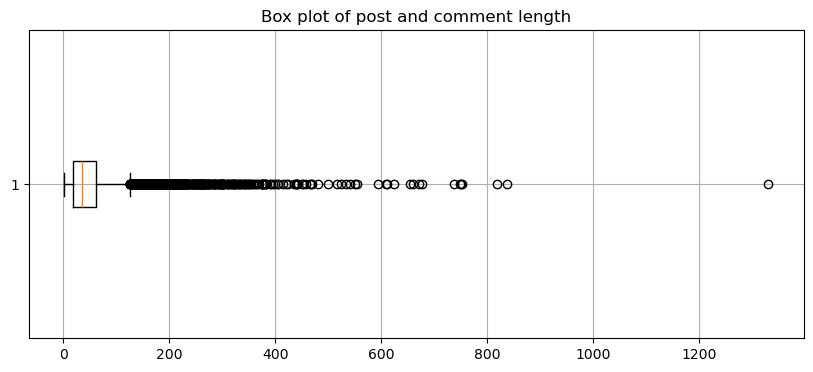

In [169]:
# post and comment length
post_length = []

for body in yt_data['text']:
    post_length.append(len(body))
    
# visalizing post/comment length distribution
plt.figure(figsize=(10, 4))
plt.boxplot(post_length, vert=False)
plt.grid(True)
plt.title('Box plot of post and comment length')
plt.show()

In [170]:
yt_data.head()

,video_id,video_title,video_published_at,comment_id,author,published_at,like_count,text
0,gTo-lPOGPdg,Australia v India | WTC23 Final | Match Highlights,2024-02-13 03:00:17+00:00,Ugx3ILTXGKmTnCQAem54AaABAg,@muhammadabdullah4337,2024-02-13 03:54:39+00:00,7301,"ICC upload back-to-back three heartbreak moments for India in the previous 3 days. U-19 final, C..."
1,gTo-lPOGPdg,Australia v India | WTC23 Final | Match Highlights,2024-02-13 03:00:17+00:00,Ugwu72NlIMxn_LSSmYB4AaABAg,@anuraggamerz9278,2024-02-29 16:20:03+00:00,5329,Travis Head is the real villian for India in the finals🥶💀
2,gTo-lPOGPdg,Australia v India | WTC23 Final | Match Highlights,2024-02-13 03:00:17+00:00,UgwNkzuTGtb_LG1cFNN4AaABAg,@DJSarvesh007,2024-02-13 03:35:01+00:00,2192,Head in Tests and ODIs gave a tough time for Indian bowlers 🥺. Complete player for Aussies.
3,gTo-lPOGPdg,Australia v India | WTC23 Final | Match Highlights,2024-02-13 03:00:17+00:00,UgzH9bibBcj5mvb1VAx4AaABAg,@Saurabh__Shukla,2024-02-13 03:28:07+00:00,1918,Smithy came in final after a horrible BGT and blaze all the guns. BIG GAME PLAYER.🥶🔥
4,gTo-lPOGPdg,Australia v India | WTC23 Final | Match Highlights,2024-02-13 03:00:17+00:00,UgxVyA2u0KRii-AnMfN4AaABAg,@nirajghaleedits601,2024-02-27 11:46:03+00:00,1642,Now ICC will post 2003 CWC Final 🇦🇺 vs 🇮🇳\n💀💀


In [171]:
# defining a function to tokenize data
def data_tokenizer(text, tokenizer):

    token_list = tokenizer.tokenize(text)
    token_list = [token.strip() for token in token_list]

    return token_list

In [172]:
# initializing the necessary components
tokenizer = nltk.tokenize.TweetTokenizer()
punctuations = list(string.punctuation)
lStopwords = nltk.corpus.stopwords.words('english') + punctuations + ['...','']
stemmer = nltk.stem.PorterStemmer()
lemmatizer = WordNetLemmatizer()
vader_analyzer = SentimentIntensityAnalyzer()

In [173]:
# defining the dictionary for pos tag mapping
pos_map = {'ADJ':'a','ADP':'s','ADV':'r','NOUN':'n','VERB':'v'}

In [174]:
# generating tokens

# to store tokens
tokens =[]

# defining a counter to count the tokens
termFreqCounter = Counter()

for body in yt_data['text']:
    temp_tokens = data_tokenizer(body,tokenizer)
    tokens.append(temp_tokens)
    termFreqCounter.update(temp_tokens)

In [175]:
# checking tokens list
tokens[1]

['Travis',
 'Head',
 'is',
 'the',
 'real',
 'villian',
 'for',
 'India',
 'in',
 'the',
 'finals',
 '🥶',
 '💀']

In [176]:
# observing token counts for 50 most common tokens
for term, count in termFreqCounter.most_common(50):
    print(term + ': ' + str(count))

❤: 2782
😂: 2774
the: 2484
.: 2012
in: 1680
is: 1622
,: 1592
of: 1566
India: 1400
🇮🇳: 1257
to: 1148
and: 1067
this: 895
a: 868
for: 761
😢: 736
Australia: 697
innings: 679
I: 647
🎉: 644
...: 627
🔥: 619
hai: 595
Maxwell: 587
match: 566
he: 565
!: 524
was: 514
cricket: 504
😅: 488
world: 484
team: 455
🇧🇩: 455
that: 452
️: 451
?: 401
india: 386
final: 384
best: 384
it: 384
not: 375
all: 366
be: 357
cup: 356
The: 351
This: 344
you: 338
one: 337
will: 336
win: 335


c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127475 (\N{REGIONAL INDICATOR SYMBOL LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127463 (\N{REGIONAL INDICATOR SYMBOL LETTER B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **k

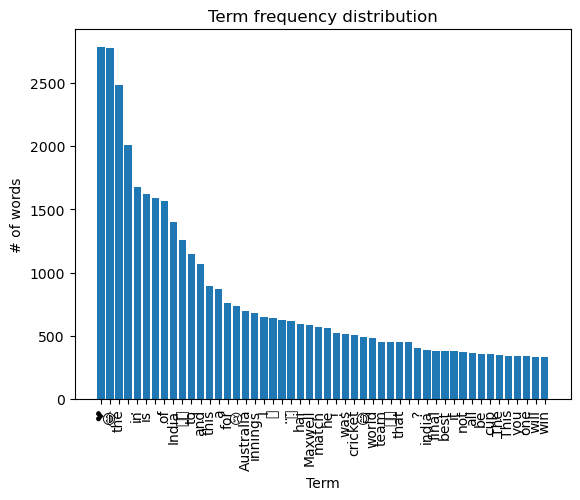

In [177]:
# plotting most common term counts
y = [count for tag, count in termFreqCounter.most_common(50)]
x = [tag for tag, count in termFreqCounter.most_common(50)]

plt.bar(x, y)
plt.title("Term frequency distribution")
plt.ylabel('# of words')
plt.xlabel('Term')
plt.xticks(rotation = 90)
plt.show()

In [178]:
# defining a function for pre-processing

def preprocessor_lemmatizer(text):
    # remove unicode character
    text = re.sub(u"(\u2018|\u2019|\u2014|\u2026|\u201d|\u201c|\ud83e|\udd14|U+002E|U+002E|=/|\.{2,})", "",text)
    # tokenization
    token_list = tokenizer.tokenize(text)
    # strip white spaces
    token_list = [token.strip() for token in token_list]
    # converting to lowercase
    token_list = [token.lower() for token in token_list]

    # to identify numbers (both decimal and real numbers)
    digit_pattern = re.compile(r"\b\d+(\.\d+)?\b")
    # to identify links
    link_pattern = re.compile(r'^http.*|.*\.com|^www.*')
    # to identify tokens with mixed letters and digits
    digit_letter_mix_pattern = re.compile(r"^(?=.*[A-Za-z])(?=.*\d)[A-Za-z\d]+$")
    
    hindi_words = [
    'hai', 'ka', 'ko', 'ki', 'ke', 'kaun', 'kya', 'bhi', 'nahi', 'nhi', 'se','ji','aaj', 'rha', 
    'tha', 'ho', 'hain', 'aur', 'ne', 'ho', 'le', 'gaya', 'na', 'jo', 'ka', 'से','bhai','hi',
    'tha', 'kuch', 'kya', 'ka', 'se', 'sab', 'bhi', 'kaun', 'kyon', 'diya', 'dekh','की',
    'ye', 'raha', 'hai', 'hota', 'ho', 'ka', 'le', 'yeh', 'jo', 'mein', 'को','में','और', 
    'ho', 'gaya', 'ka', 'kaun', 'aur', 'hai', 'nahi', 'ke', 'se','है','jai','के','का','baap','भी'
    ]

    token_list = [token for token in token_list if token not in lStopwords and digit_pattern.match(token) == None and link_pattern.match(token) == None and digit_letter_mix_pattern.match(token) == None and token.strip()]

    token_list = [token for token in token_list if token not in hindi_words]
    
    # identify pos tags
    tags = pos_tag(token_list, tagset='universal')

    # mapping to a readble pos tag format for lemmatizer
    tags = [(token,pos_map[tag] if tag in pos_map.keys() else 'n')for (token,tag) in tags]

    # lemmatizations
    token_list = [lemmatizer.lemmatize(token,tag) for (token,tag) in tags]
    
    # remove single letter tokens
    token_list = [token for token in token_list if len(token)>1]

    return token_list

<>:5: DeprecationWarning: invalid escape sequence '\.'
<>:5: DeprecationWarning: invalid escape sequence '\.'
C:\Users\Sun Coliamco\AppData\Local\Temp\ipykernel_17300\4273921630.py:5: DeprecationWarning: invalid escape sequence '\.'
  text = re.sub(u"(\u2018|\u2019|\u2014|\u2026|\u201d|\u201c|\ud83e|\udd14|U+002E|U+002E|=/|\.{2,})", "",text)


In [179]:
# applying pre-processing

# defining a counter to count the frequency of tokens
termFreqCounter = Counter()

preprocessed_tokens = []

for body in tqdm(yt_data['text']):
    temp_tokens = preprocessor_lemmatizer(body)
    preprocessed_tokens.append(temp_tokens)
    termFreqCounter.update(temp_tokens)

c:\ProgramData\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\ProgramData\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\ProgramData\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\ProgramData\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. P

  0%|          | 0/11692 [00:00<?, ?it/s]

In [180]:
# observing token counts for 50 most common tokens
for term, count in termFreqCounter.most_common(50):
    print(term + ': ' + str(count))

india: 1905
🇮🇳: 1257
inning: 922
australia: 820
maxwell: 754
world: 694
match: 678
cricket: 650
final: 567
team: 550
best: 535
great: 522
cup: 520
one: 509
icc: 492
win: 456
🇧🇩: 455
indian: 424
play: 395
head: 390
time: 385
king: 359
ipl: 350
like: 347
odi: 334
rohit: 326
bumrah: 308
gill: 296
test: 288
ever: 288
player: 282
watch: 282
kohli: 276
wtc: 274
🇱🇰: 264
maxi: 236
live: 235
wc: 227
rcb: 223
virat: 222
warner: 222
travis: 213
see: 213
bro: 208
bangladesh: 200
get: 196
boom: 196
lose: 193
well: 192
knock: 189


In [181]:
# from langdetect import detect

# import nltk
# from nltk.corpus import words
# nltk.download('words')

# can not used

In [182]:
# defining a pre-processor for vader
def vader_pre_processor(text):
    tokens = tokenizer.tokenize(text)

    # removing digits
    digit_pattern = re.compile(r"\b\d+(\.\d+)?\b")
    # removing links
    link_pattern = re.compile(r'^http.*|.*\.com|^www.*')
    # hindi words
    hindi_words = [
    'hai', 'ka', 'ko', 'ki', 'ke', 'kaun', 'kya', 'bhi', 'nahi', 'nhi', 'se','ji','aaj', 'rha', 
    'tha', 'ho', 'hain', 'aur', 'ne', 'ho', 'le', 'gaya', 'na', 'jo', 'ka', 'से','bhai','hi',
    'tha', 'kuch', 'kya', 'ka', 'se', 'sab', 'bhi', 'kaun', 'kyon', 'diya', 'dekh','की',
    'ye', 'raha', 'hai', 'hota', 'ho', 'ka', 'le', 'yeh', 'jo', 'mein', 'को','में','और', 
    'ho', 'gaya', 'ka', 'kaun', 'aur', 'hai', 'nahi', 'ke', 'se','है','jai','के','का','baap','भी'
    ]

    # filtering tokens
    tokens = [token.strip() for token in tokens if token not in hindi_words and digit_pattern.match(token)==None and link_pattern.match(token)==None and token.strip()]

    # joining tokens togeter
    text = ' '.join(tokens)

    return text

In [183]:
#apply vader preprocessing
vader_tokens = []

for body in tqdm(yt_data['text']):
    temp_tokens = vader_pre_processor(body)
    vader_tokens.append(temp_tokens)

c:\ProgramData\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\ProgramData\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\ProgramData\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\ProgramData\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. P

  0%|          | 0/11692 [00:00<?, ?it/s]

In [184]:
preprocessed_tokens = [" ".join(token) for token in preprocessed_tokens]
yt_data.loc[:, 'Processed_1'] = preprocessed_tokens
yt_data.loc[:, 'Processed_2'] = vader_tokens

In [185]:
yt_data.head()

,video_id,video_title,video_published_at,comment_id,author,published_at,like_count,text,Processed_1,Processed_2
0,gTo-lPOGPdg,Australia v India | WTC23 Final | Match Highlights,2024-02-13 03:00:17+00:00,Ugx3ILTXGKmTnCQAem54AaABAg,@muhammadabdullah4337,2024-02-13 03:54:39+00:00,7301,"ICC upload back-to-back three heartbreak moments for India in the previous 3 days. U-19 final, C...",icc upload back-to-back three heartbreak moment india previous day final cwc final wtc final icc...,"ICC upload back-to-back three heartbreak moments for India in the previous days . U - final , CW..."
1,gTo-lPOGPdg,Australia v India | WTC23 Final | Match Highlights,2024-02-13 03:00:17+00:00,Ugwu72NlIMxn_LSSmYB4AaABAg,@anuraggamerz9278,2024-02-29 16:20:03+00:00,5329,Travis Head is the real villian for India in the finals🥶💀,travis head real villian india final,Travis Head is the real villian for India in the finals 🥶 💀
2,gTo-lPOGPdg,Australia v India | WTC23 Final | Match Highlights,2024-02-13 03:00:17+00:00,UgwNkzuTGtb_LG1cFNN4AaABAg,@DJSarvesh007,2024-02-13 03:35:01+00:00,2192,Head in Tests and ODIs gave a tough time for Indian bowlers 🥺. Complete player for Aussies.,head test odis give tough time indian bowler complete player aussie,Head in Tests and ODIs gave a tough time for Indian bowlers 🥺 . Complete player for Aussies .
3,gTo-lPOGPdg,Australia v India | WTC23 Final | Match Highlights,2024-02-13 03:00:17+00:00,UgzH9bibBcj5mvb1VAx4AaABAg,@Saurabh__Shukla,2024-02-13 03:28:07+00:00,1918,Smithy came in final after a horrible BGT and blaze all the guns. BIG GAME PLAYER.🥶🔥,smithy come final horrible bgt blaze gun big game player,Smithy came in final after a horrible BGT and blaze all the guns . BIG GAME PLAYER . 🥶 🔥
4,gTo-lPOGPdg,Australia v India | WTC23 Final | Match Highlights,2024-02-13 03:00:17+00:00,UgxVyA2u0KRii-AnMfN4AaABAg,@nirajghaleedits601,2024-02-27 11:46:03+00:00,1642,Now ICC will post 2003 CWC Final 🇦🇺 vs 🇮🇳\n💀💀,icc post cwc final 🇦🇺 🇮🇳,Now ICC will post CWC Final 🇦🇺 vs 🇮🇳 💀 💀


In [186]:
yt_data.shape

(11692, 10)

### sentiment analysis

In [187]:
# computing sentimenet for each comment/post
vader_sentiments = []

for index,row in tqdm(yt_data.iterrows(),total=11692):
    
    #apply pre-processing
    text = row['Processed_2']
    
    #vader polarity score
    vader_score = vader_analyzer.polarity_scores(text)
    
    #time for the comment
    comment_date = row['published_at']
    
    vader_sentiments.append([comment_date, vader_score['compound']])

c:\ProgramData\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\ProgramData\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\ProgramData\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\ProgramData\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. P

  0%|          | 0/11692 [00:00<?, ?it/s]

In [188]:
# converting to dataframe
test_sentiment = pd.DataFrame(vader_sentiments,columns=["Date_time","Sentiment"])
test_sentiment['Date_time']=pd.to_datetime(test_sentiment['Date_time'])
test_sentiment['Date_time']=test_sentiment['Date_time'].dt.date

#aggregating
test_sentiment_aggregated = test_sentiment.groupby('Date_time')['Sentiment'].mean().reset_index()

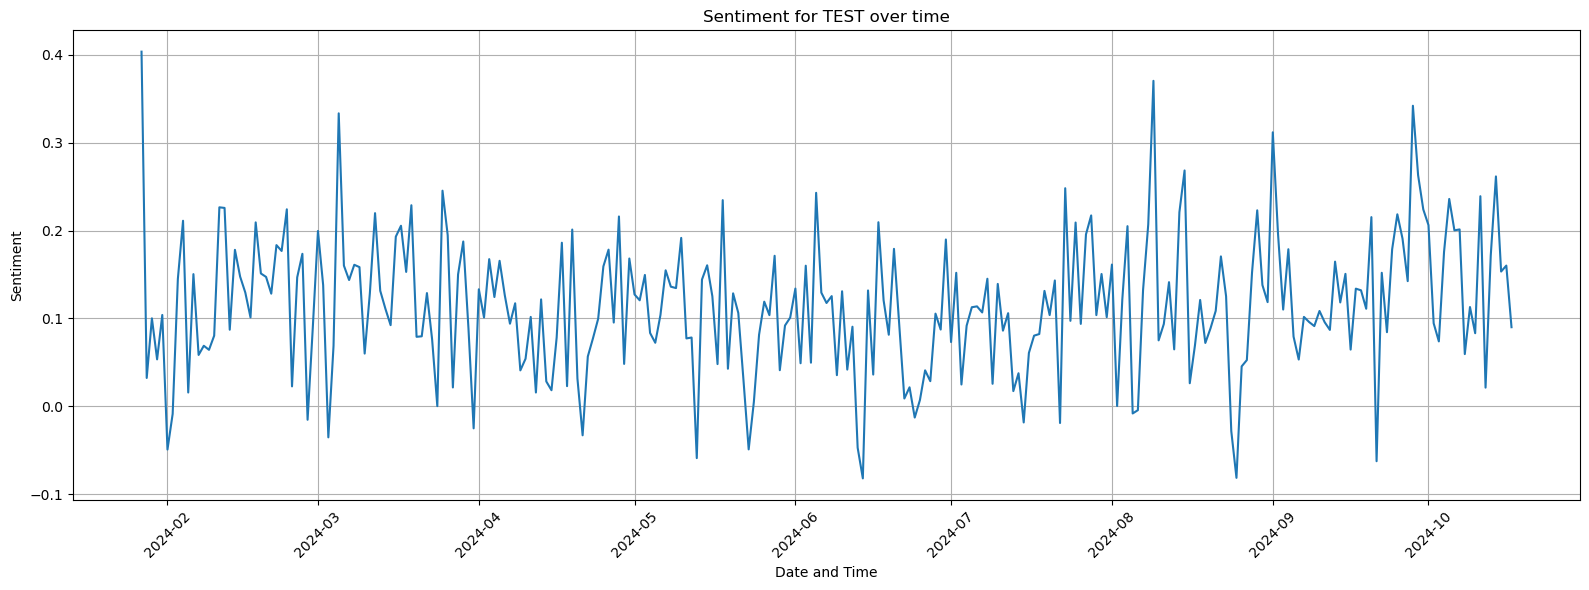

In [189]:
# plotting sentiment
plt.figure(figsize=(16, 6))
plt.plot(test_sentiment_aggregated['Date_time'],test_sentiment_aggregated['Sentiment'],linestyle='-')
plt.title('Sentiment for TEST over time')
plt.xlabel('Date and Time')
plt.ylabel('Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### exploring sentiments below -0.25

In [190]:
test_sentiment_aggregated[test_sentiment_aggregated['Sentiment']<-0.25]

,Date_time,Sentiment


### explore top 5 most negative sentiments

In [191]:
test_sentiment_aggregated[test_sentiment_aggregated['Sentiment']<0]

,Date_time,Sentiment
5,2024-02-01,-0.049239
6,2024-02-02,-0.008690
32,2024-02-28,-0.015359
36,2024-03-03,-0.035369
64,2024-03-31,-0.025121
85,2024-04-21,-0.033040
107,2024-05-13,-0.058997
117,2024-05-23,-0.049075
138,2024-06-13,-0.047121
139,2024-06-14,-0.082073


In [192]:
test_sentiment_aggregated[test_sentiment_aggregated['Sentiment']<0].sort_values(by='Sentiment').head(2)

,Date_time,Sentiment
139,2024-06-14,-0.082073
211,2024-08-25,-0.081462


In [197]:
# date_filter = ((yt_data['published_at'].dt.date == datetime(2024, 6, 14).date()) | 
#                (yt_data['published_at'].dt.date == datetime(2024, 8, 25).date()) |
#                (yt_data['published_at'].dt.date == datetime(2024, 9, 21).date()) |
#                (yt_data['published_at'].dt.date == datetime(2024, 5, 13).date()) |
#                (yt_data['published_at'].dt.date == datetime(2024, 2, 1).date())
#               )

date_filter = ((yt_data['published_at'].dt.date == datetime(2024, 6, 14).date()) | 
               (yt_data['published_at'].dt.date == datetime(2024, 8, 25).date()) 
              )

In [198]:
low_sentiment=yt_data[date_filter]
low_sentiment

,video_id,video_title,video_published_at,comment_id,author,published_at,like_count,text,Processed_1,Processed_2
318,gTo-lPOGPdg,Australia v India | WTC23 Final | Match Highlights,2024-02-13 03:00:17+00:00,Ugx5fcQbTw4NGg1Nkxl4AaABAg,@rajeshghimire1796,2024-06-14 14:45:27+00:00,2,T. Head is the official daddy of India 😅😂,head official daddy india,T . Head is the official daddy of India 😅 😂
1677,gTo-lPOGPdg,Australia v India | WTC23 Final | Match Highlights,2024-02-13 03:00:17+00:00,UgzoB7QSTeakBJEOqix4AaABAg,@VijayaRaparka,2024-08-25 11:35:53+00:00,0,"C=CLASS ,H=HORRIBLE ,O=OWNER,K=KING,L=LORD,I=IMMEDIATE",class horrible owner king lord immediate,"C = CLASS , H = HORRIBLE , O = OWNER , K = KING , L = LORD , I = IMMEDIATE"
1678,gTo-lPOGPdg,Australia v India | WTC23 Final | Match Highlights,2024-02-13 03:00:17+00:00,UgyaqLYLC9CzSj9YCYV4AaABAg,@ishowViolent444,2024-08-25 12:18:00+00:00,0,Maa to chud gyi t20 me,maa chud gyi,Maa to chud gyi t20 me
1679,gTo-lPOGPdg,Australia v India | WTC23 Final | Match Highlights,2024-02-13 03:00:17+00:00,UgzFnPdwi9TDQcsdGuJ4AaABAg,@patelzeel4242,2024-08-25 12:35:39+00:00,0,Nd also they are cheat shubaman gill not out,nd also cheat shubaman gill,Nd also they are cheat shubaman gill not out
2563,gTo-lPOGPdg,Australia v India | WTC23 Final | Match Highlights,2024-02-13 03:00:17+00:00,UgylKxWQ_H7NevCMjfd4AaABAg,@crazyshubhasmita,2024-06-14 04:01:02+00:00,0,Nub india,nub india,Nub india
2564,gTo-lPOGPdg,Australia v India | WTC23 Final | Match Highlights,2024-02-13 03:00:17+00:00,Ugz7ZdH0pxDJauESbOJ4AaABAg,@njcreation8374,2024-06-14 10:05:30+00:00,0,Australia A Real Boss,australia real bos,Australia A Real Boss
2565,gTo-lPOGPdg,Australia v India | WTC23 Final | Match Highlights,2024-02-13 03:00:17+00:00,UgxWTzSwxkVhjaO8Qr54AaABAg,@pankajrao6515,2024-06-14 12:34:07+00:00,0,Please australia ko defeat kro yar hmesaha final m kyu hota hai esa😢😢😢😢😢,please australia defeat kro yar hmesaha final kyu esa,Please australia defeat kro yar hmesaha final m kyu esa 😢 😢 😢
5368,MbKhGIPRvGI,Australian young gun Sam Konstas put to the test as he compares the game&#39;s greats #cricket,2024-01-28 04:00:06+00:00,Ugyxyd1i0eXzAf6m5gp4AaABAg,@reenakumari2210,2024-08-25 07:01:01+00:00,0,😂😂😂😂😂😂😂😂😂😂😂😂 shubhaman gill,shubhaman gill,😂 😂 😂 shubhaman gill
5374,MbKhGIPRvGI,Australian young gun Sam Konstas put to the test as he compares the game&#39;s greats #cricket,2024-01-28 04:00:06+00:00,UgyLOQvfla703333Kq14AaABAg,@Ayushmancricketking,2024-08-25 04:59:11+00:00,0,Lockdown Kids 😂😂😂,lockdown kid,Lockdown Kids 😂 😂 😂
5375,MbKhGIPRvGI,Australian young gun Sam Konstas put to the test as he compares the game&#39;s greats #cricket,2024-01-28 04:00:06+00:00,UgyXIoOgEUrD9nMZ5ot4AaABAg,@Govindsingh-um7lv,2024-08-25 06:05:31+00:00,0,Rohit >>> warner,rohit warner,Rohit > > > warner


In [199]:
# there isn't really any meaningful or negative to see
# but a bunch possibly bots or bot like users
for text in low_sentiment['text']:
    print(text)

T. Head is the official daddy of India 😅😂
C=CLASS ,H=HORRIBLE ,O=OWNER,K=KING,L=LORD,I=IMMEDIATE
Maa to chud gyi t20 me
Nd also they are cheat shubaman gill not out
Nub india
Australia A Real Boss
Please australia ko defeat kro yar hmesaha final m kyu hota hai esa😢😢😢😢😢
😂😂😂😂😂😂😂😂😂😂😂😂 shubhaman gill
Lockdown Kids 😂😂😂
Rohit >>> warner
Virat Kohli ❤❤
The ones who are shocked that he picked shubhman over warner, you guys went blind when he picked smith over yuvi ? This kid is in his own matrix 😂
Baaee__bar azam😅
this guy choosen warner over rohit is still acceptable but he choosen gill over warner😂😂😂😂😂😂 and babar over gill😂
That bowl to ollie pope is one of the deadliest yorker ever 😲😶‍🌫
No.1 bowler in the world bumrah 💪💪💪💪💪
Sabbash JAWAN..........
Bhai waa❤
🔥🔥🔥🔥
Booom Booom 🤫🤫🤫🤫😜😜
Yorker LEGEND ONE & ONLY MALINGA 🧔‍♂️🧔‍♂️🤓🤓👍👍💯💯
All his ego got destroyed in his first ever ipl
Rabada ka Bhai 😂
Who is watching after RR elimination
People:You need feet movement to hit shots Maxwell:you need a s

In [200]:
for text in low_sentiment['video_title'].drop_duplicates():
    print(text)

Australia v India | WTC23 Final | Match Highlights
Australian young gun Sam Konstas put to the test as he compares the game&#39;s greats #cricket
The King of Yorkers Jasprit Bumrah is now the No.1 Men&#39;s Test bowler in the world 🤩  #Cricket
It&#39;s a fiery contest happening in Benoni 🥵#U19WorldCup #Cricket #ytshorts
Glenn Maxwell produces one of the greatest ODI knocks of all-time | CWC23


In [201]:
comment_text = yt_data['Processed_1'].tolist()

In [202]:
# creating the count vectorzer object
tfVectorizer = CountVectorizer(max_df=0.95, min_df=30, stop_words='english')
# generating the count vector
tf = tfVectorizer.fit_transform(comment_text)
# list of words in count vector
tfFeatureNames = tfVectorizer.get_feature_names_out()

In [203]:
# no of words in count vector
len(tfFeatureNames)

262

In [204]:
# define an array to check different topic counts
num_topics = list(range(2, 6))
num_topics.append(10)
# defining an empty array to store log-liklihood scores
log_likelihood_scores = []

# creating LDA models for each topic count and storing the log-likelihood score
for num_topic in tqdm(num_topics, total=len(num_topics)):

    ldaModel = LatentDirichletAllocation(n_components =num_topic, max_iter=10, learning_method='online',random_state=100).fit(tf)
    log_likelihood_score = ldaModel.score(tf)
    log_likelihood_scores.append([num_topic, log_likelihood_score])

c:\ProgramData\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\ProgramData\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\ProgramData\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\ProgramData\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. P

  0%|          | 0/5 [00:00<?, ?it/s]

In [205]:
log_likelihood_scores

[[2, -165822.999482654],
 [3, -166375.21157998944],
 [4, -167576.8277824493],
 [5, -167827.06123558947],
 [10, -171507.62003336602]]

In [206]:
# checking for topic count of 2
ldaModel = LatentDirichletAllocation(n_components =2, max_iter=10, learning_method='online', random_state=100).fit(tf)
# visualization for topic count 2
panel = pyLDAvis.lda_model.prepare(ldaModel, tf, tfVectorizer, mds='tsne')
pyLDAvis.display(panel)

In [207]:
# checking for topic count of 3
ldaModel = LatentDirichletAllocation(n_components =3, max_iter=10, learning_method='online', random_state=100).fit(tf)
# visualization for topic count 3
panel = pyLDAvis.lda_model.prepare(ldaModel, tf, tfVectorizer, mds='tsne')
pyLDAvis.display(panel)

In [208]:
# checking for topic count of 4
ldaModel = LatentDirichletAllocation(n_components =4, max_iter=10, learning_method='online', random_state=100).fit(tf)
# visualization for topic count 4
panel = pyLDAvis.lda_model.prepare(ldaModel, tf, tfVectorizer, mds='tsne')
pyLDAvis.display(panel)

In [209]:
# checking for topic count of 5
ldaModel = LatentDirichletAllocation(n_components =5, max_iter=10, learning_method='online', random_state=100).fit(tf)
# visualization for topic count 5
panel = pyLDAvis.lda_model.prepare(ldaModel, tf, tfVectorizer, mds='tsne')
pyLDAvis.display(panel)

In [ ]:
# checking for topic count of 10
ldaModel = LatentDirichletAllocation(n_components =10, max_iter=10, learning_method='online', random_state=100).fit(tf)
# visualization for topic count 10
panel = pyLDAvis.lda_model.prepare(ldaModel, tf, tfVectorizer, mds='tsne')
pyLDAvis.display(panel)

NameError: name 'topic_sentiments' is not defined